## **Preprocessing**

In [ ]:
%pip install --upgrade scikit-learn==1.3.2

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel('https://raw.githubusercontent.com/gopiashokan/Rental-Property-Prices-Prediction/main/Dataset/House_Rent_Train.xlsx')
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,SEMI_FURNISHED,BOTH,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.nunique()

id                 20523
type                   9
locality            1917
activation_date    19566
latitude           17733
longitude          17726
lease_type             4
gym                    2
lift                   2
swimming_pool          2
negotiable             2
furnishing             3
parking                4
property_size       1141
property_age          44
bathroom               8
facing                 8
cup_board             19
floor                 23
total_floor           27
amenities           4994
water_supply           3
building_type          4
balconies              9
rent                 206
dtype: int64

In [5]:
# id columns have 99.8% unique values, so drop the column

df.drop(columns='id', inplace=True)
df.tail()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20550,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,SEMI_FURNISHED,BOTH,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20554,BHK1,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [7]:
# drop the null values

df = df.dropna().reset_index(drop=True)
df.tail()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20372,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0
20373,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20374,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20375,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0
20376,BHK1,Malleshwaram West,2018-08-07 22:31:00,12.998645,77.574336,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,3.0,1.0,E,1.0,1.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,8500.0


In [8]:
df.isnull().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [9]:
df.loc[0,'amenities']

'{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}'

In [10]:
df.loc[1,'amenities']

'{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":false,"SC":true,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":true,"VP":true}'

In [11]:
# convert string dictionary into dictionary

def amenities_encoding(amenities):

    # load the string dictionary to json [convert true=True and false=False - boolean format]
    a = json.loads(amenities)

    # value = True means convert to 1, else convert to 0 ----> [so True convert to 1 and False convert to 0]
    b = {key:1 if value else 0 for key,value in a.items()}

    # remove the existing column in df
    for i in ['LIFT','GYM','POOL']:
        b.pop(i, None)

    return b

In [12]:
# string dictionary convert to dictionary

df['amenities'] = df['amenities'].apply(lambda x: amenities_encoding(x))
df.tail(3)

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20374,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,"{'INTERNET': 1, 'AC': 0, 'CLUB': 1, 'INTERCOM'...",BOREWELL,AP,2.0,16000.0
20375,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,"{'INTERNET': 1, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORP_BORE,AP,3.0,30000.0
20376,BHK1,Malleshwaram West,2018-08-07 22:31:00,12.998645,77.574336,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,3.0,1.0,E,1.0,1.0,1.0,"{'INTERNET': 0, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORPORATION,IH,1.0,8500.0


In [13]:
# make new dataframe for amenities dictionary
amenities_df = pd.DataFrame(df['amenities'].tolist(), index=df.index)

# column names convert to lower case
amenities_df.columns = amenities_df.columns.str.lower()
amenities_df.tail()

,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
20372,1,0,0.0,0,0.0,1,0.0,1,1,1.0,1,0.0,0.0,1,0,1.0
20373,1,0,0.0,0,0.0,0,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0
20374,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
20375,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
20376,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0


In [14]:
# concatinate amenities dataframe with df

df = pd.concat([df, amenities_df], axis=1)
df.drop(columns='amenities', inplace=True)
df.tail()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
20372,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,CORP_BORE,AP,1.0,20000.0,1,0,0.0,0,0.0,1,0.0,1,1,1.0,1,0.0,0.0,1,0,1.0
20373,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,CORPORATION,IH,2.0,30000.0,1,0,0.0,0,0.0,0,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0
20374,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
20375,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
20376,BHK1,Malleshwaram West,2018-08-07 22:31:00,12.998645,77.574336,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,3.0,1.0,E,1.0,1.0,1.0,CORPORATION,IH,1.0,8500.0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0


In [15]:
df.isnull().sum()

type                  0
locality              0
activation_date       0
latitude              0
longitude             0
lease_type            0
gym                   0
lift                  0
swimming_pool         0
negotiable            0
furnishing            0
parking               0
property_size         0
property_age          0
bathroom              0
facing                0
cup_board             0
floor                 0
total_floor           0
water_supply          0
building_type         0
balconies             0
rent                  0
internet              0
ac                    0
club               1055
intercom              0
cpa                1055
fs                    0
servant            1055
security              0
sc                    0
gp                 1055
park                  0
rwh                1055
stp                1055
hk                    0
pb                    0
vp                 1055
dtype: int64

In [16]:
# Handling null values ---> replace with 0

df.fillna(0, inplace=True)
df.tail()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
20372,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,CORP_BORE,AP,1.0,20000.0,1,0,0.0,0,0.0,1,0.0,1,1,1.0,1,0.0,0.0,1,0,1.0
20373,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,CORPORATION,IH,2.0,30000.0,1,0,0.0,0,0.0,0,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0
20374,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
20375,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
20376,BHK1,Malleshwaram West,2018-08-07 22:31:00,12.998645,77.574336,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,3.0,1.0,E,1.0,1.0,1.0,CORPORATION,IH,1.0,8500.0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0


In [17]:
df.isnull().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
rent               0
internet           0
ac                 0
club               0
intercom           0
cpa                0
fs                 0
servant            0
security           0
sc                 0
gp                 0
park               0
rwh                0
stp                0
hk                 0
pb                 0
vp                 0
dtype: int64

In [18]:
df1 = df
df1.tail()

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
20372,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,CORP_BORE,AP,1.0,20000.0,1,0,0.0,0,0.0,1,0.0,1,1,1.0,1,0.0,0.0,1,0,1.0
20373,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,CORPORATION,IH,2.0,30000.0,1,0,0.0,0,0.0,0,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0
20374,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
20375,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
20376,BHK1,Malleshwaram West,2018-08-07 22:31:00,12.998645,77.574336,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,3.0,1.0,E,1.0,1.0,1.0,CORPORATION,IH,1.0,8500.0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0


In [19]:
df1.nunique()

type                   9
locality            1917
activation_date    19429
latitude           17625
longitude          17617
lease_type             4
gym                    2
lift                   2
swimming_pool          2
negotiable             2
furnishing             3
parking                4
property_size       1136
property_age          44
bathroom               8
facing                 8
cup_board             19
floor                 23
total_floor           27
water_supply           3
building_type          4
balconies              9
rent                 206
internet               2
ac                     2
club                   2
intercom               2
cpa                    2
fs                     2
servant                2
security               2
sc                     2
gp                     2
park                   2
rwh                    2
stp                    2
hk                     2
pb                     2
vp                     2
dtype: int64

In [20]:
df1.tail(3)

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
20374,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
20375,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
20376,BHK1,Malleshwaram West,2018-08-07 22:31:00,12.998645,77.574336,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,3.0,1.0,E,1.0,1.0,1.0,CORPORATION,IH,1.0,8500.0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0


In [21]:
# data type convertion
df1['activation_date'] = pd.to_datetime(df1['activation_date'])
df1.tail(2)

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
20375,BHK2,Indiranagar,2018-06-28 21:58:00,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
20376,BHK1,Malleshwaram West,2018-08-07 22:31:00,12.998645,77.574336,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,3.0,1.0,E,1.0,1.0,1.0,CORPORATION,IH,1.0,8500.0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0


In [22]:
# date column split into day, month, year columns

df1['activation_day'] = df1['activation_date'].dt.day
df1['activation_month'] = df1['activation_date'].dt.month
df1['activation_year'] = df1['activation_date'].dt.year
df1.drop(columns='activation_date', inplace=True)
df1.tail(3)

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year
20374,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0,21,12,2017
20375,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0,28,6,2018
20376,BHK1,Malleshwaram West,12.998645,77.574336,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,3.0,1.0,E,1.0,1.0,1.0,CORPORATION,IH,1.0,8500.0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0,7,8,2018


In [23]:
# calculate the count of amenities

df1['no_of_amenities'] = df1['gym'] + df1['lift'] + df1['swimming_pool'] + df1['internet'] + df1['ac'] + df1['club'] + df1['intercom'] + df1['cpa'] + df1['fs'] + df1['servant'] + df1['security'] + df1['sc'] + df1['gp'] + df1['park'] + df1['rwh'] + df1['stp'] + df1['hk'] + df1['pb'] + df1['vp']
df1.tail(3)

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
20374,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0,21,12,2017,8.0
20375,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0,28,6,2018,10.0
20376,BHK1,Malleshwaram West,12.998645,77.574336,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,3.0,1.0,E,1.0,1.0,1.0,CORPORATION,IH,1.0,8500.0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0,7,8,2018,2.0


In [24]:
df1.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
count,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000
mean,12.945750,77.637238,0.226235,0.361142,0.174461,0.711488,1061.437209,5.777053,1.857732,4.567503,1.869510,3.798106,1.147863,19048.502969,0.661825,0.042548,0.185601,0.192865,0.291701,0.234676,0.037150,0.472984,0.471512,0.099917,0.506012,0.246503,0.170535,0.198557,0.364921,0.238553,15.344555,6.325072,2017.637336,5.177700
std,0.029587,0.110758,0.418404,0.480344,0.379515,0.453081,591.857798,6.362450,0.710933,336.427053,2.181633,3.183849,0.993290,8433.444157,0.473100,0.201841,0.388794,0.394557,0.454557,0.423807,0.189133,0.499282,0.499200,0.299896,0.499976,0.430986,0.376112,0.398924,0.481420,0.426209,8.864386,3.251640,0.480781,4.570412
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000
25%,12.918232,77.571912,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,2017.000000,2.000000
50%,12.943792,77.633367,0.000000,0.000000,0.000000,1.000000,1044.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,6.000000,2018.000000,3.000000
75%,12.970922,77.695692,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.000000,9.000000,2018.000000,8.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2018.000000,19.000000


In [25]:
# remove the negative value in property_age column

df1 = df1[df1['property_age']>=0].reset_index(drop=True)
df1.tail(3)

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
20341,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,BOREWELL,AP,2.0,16000.0,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0,21,12,2017,8.0
20342,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,CORP_BORE,AP,3.0,30000.0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0,28,6,2018,10.0
20343,BHK1,Malleshwaram West,12.998645,77.574336,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,3.0,1.0,E,1.0,1.0,1.0,CORPORATION,IH,1.0,8500.0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0,7,8,2018,2.0


In [26]:
df1.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
count,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000
mean,12.945743,77.637263,0.226406,0.361040,0.174548,0.711266,1061.762338,5.788046,1.858140,4.572061,1.870035,3.797582,1.147857,19048.188409,0.661817,0.042568,0.185706,0.192932,0.291831,0.234664,0.037161,0.472965,0.471687,0.099784,0.505948,0.246412,0.170615,0.198781,0.365022,0.238547,15.342017,6.325796,2017.636748,5.178431
std,0.029582,0.110805,0.418515,0.480314,0.379589,0.453185,592.100777,6.361746,0.711027,336.699793,2.182685,3.184757,0.993298,8431.271930,0.473103,0.201886,0.388879,0.394609,0.454616,0.423799,0.189160,0.499281,0.499210,0.299719,0.499977,0.430932,0.376182,0.399093,0.481448,0.426206,8.862771,3.253369,0.480948,4.571908
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000
25%,12.918239,77.571956,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,2017.000000,2.000000
50%,12.943787,77.633368,0.000000,0.000000,0.000000,1.000000,1045.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,6.000000,2018.000000,3.000000
75%,12.970899,77.695702,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.000000,9.000000,2018.000000,8.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2018.000000,19.000000


In [27]:
# rearrange the columns order

df1 = df1[['activation_day', 'activation_month', 'activation_year', 'locality', 'latitude', 'longitude', 'type', 'lease_type',
           'property_size', 'property_age', 'furnishing', 'facing', 'floor', 'total_floor', 'building_type', 'water_supply',
           'negotiable', 'cup_board', 'balconies', 'parking', 'bathroom', 'gym', 'lift', 'swimming_pool', 'internet', 'ac',
           'club', 'intercom', 'cpa', 'fs', 'servant', 'security', 'sc', 'gp', 'park', 'rwh', 'stp', 'hk', 'pb', 'vp', 'no_of_amenities', 'rent']]

df1.tail()

,activation_day,activation_month,activation_year,locality,latitude,longitude,type,lease_type,property_size,property_age,furnishing,facing,floor,total_floor,building_type,water_supply,negotiable,cup_board,balconies,parking,bathroom,gym,lift,swimming_pool,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
20339,10,11,2017,Ulsoor,12.979762,77.615395,BHK1,ANYONE,850,30.0,SEMI_FURNISHED,E,1.0,4.0,AP,CORP_BORE,1,1.0,1.0,TWO_WHEELER,2.0,0,1,0,1,0,0.0,0,0.0,1,0.0,1,1,1.0,1,0.0,0.0,1,0,1.0,9.0,20000.0
20340,19,10,2017,Koramangala 4th Block,12.931072,77.632361,BHK2,ANYONE,1000,10.0,SEMI_FURNISHED,N,1.0,2.0,IH,CORPORATION,1,2.0,2.0,BOTH,2.0,0,0,0,1,0,0.0,0,0.0,0,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0,4.0,30000.0
20341,21,12,2017,Kumaraswamy Layout,12.901800,77.566597,BHK2,FAMILY,1000,0.0,SEMI_FURNISHED,W,5.0,5.0,AP,BOREWELL,1,2.0,2.0,BOTH,2.0,1,1,0,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0,8.0,16000.0
20342,28,6,2018,Indiranagar,12.965502,77.647694,BHK2,FAMILY,1000,5.0,SEMI_FURNISHED,E,2.0,4.0,AP,CORP_BORE,0,2.0,3.0,BOTH,2.0,0,1,0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0,10.0,30000.0
20343,7,8,2018,Malleshwaram West,12.998645,77.574336,BHK1,ANYONE,500,3.0,SEMI_FURNISHED,E,1.0,1.0,IH,CORPORATION,1,1.0,1.0,TWO_WHEELER,1.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0,2.0,8500.0


In [28]:
df1['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3'], dtype=object)

In [29]:
# Handle the wrong value names (duplicate)

type_dict = {'1BHK1':'BHK1', 'bhk2':'BHK2', 'bhk3':'BHK3'}

df1['type'] = df1['type'].apply(lambda x: type_dict[x] if x in ['1BHK1', 'bhk2', 'bhk3'] else x)
df1.tail()

,activation_day,activation_month,activation_year,locality,latitude,longitude,type,lease_type,property_size,property_age,furnishing,facing,floor,total_floor,building_type,water_supply,negotiable,cup_board,balconies,parking,bathroom,gym,lift,swimming_pool,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
20339,10,11,2017,Ulsoor,12.979762,77.615395,BHK1,ANYONE,850,30.0,SEMI_FURNISHED,E,1.0,4.0,AP,CORP_BORE,1,1.0,1.0,TWO_WHEELER,2.0,0,1,0,1,0,0.0,0,0.0,1,0.0,1,1,1.0,1,0.0,0.0,1,0,1.0,9.0,20000.0
20340,19,10,2017,Koramangala 4th Block,12.931072,77.632361,BHK2,ANYONE,1000,10.0,SEMI_FURNISHED,N,1.0,2.0,IH,CORPORATION,1,2.0,2.0,BOTH,2.0,0,0,0,1,0,0.0,0,0.0,0,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0,4.0,30000.0
20341,21,12,2017,Kumaraswamy Layout,12.901800,77.566597,BHK2,FAMILY,1000,0.0,SEMI_FURNISHED,W,5.0,5.0,AP,BOREWELL,1,2.0,2.0,BOTH,2.0,1,1,0,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0,8.0,16000.0
20342,28,6,2018,Indiranagar,12.965502,77.647694,BHK2,FAMILY,1000,5.0,SEMI_FURNISHED,E,2.0,4.0,AP,CORP_BORE,0,2.0,3.0,BOTH,2.0,0,1,0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0,10.0,30000.0
20343,7,8,2018,Malleshwaram West,12.998645,77.574336,BHK1,ANYONE,500,3.0,SEMI_FURNISHED,E,1.0,1.0,IH,CORPORATION,1,1.0,1.0,TWO_WHEELER,1.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0,2.0,8500.0


In [30]:
df1['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS'], dtype=object)

In [31]:
df1['facing'].unique()

array(['NE', 'E', 'S', 'N', 'SE', 'W', 'NW', 'SW'], dtype=object)

In [32]:
# save to csv file at before encoding for EDA

# df1.to_csv('df_before_encode.csv', index=False)

In [33]:
# encoding the categorical features into numerical features

df1['type'] = df1['type'].map({'RK1':0, 'BHK1':1, 'BHK2':2, 'BHK3':3, 'BHK4':4, 'BHK4PLUS':5})
df1['facing'] = df1['facing'].map({'N':1, 'E':2, 'W':3, 'S':4, 'NE':5, 'NW':6, 'SE':7, 'SW':8})
df1['lease_type'] = df1['lease_type'].map({'BACHELOR':1, 'FAMILY':2, 'COMPANY':3, 'ANYONE':4})
df1['furnishing'] = df1['furnishing'].map({'NOT_FURNISHED':0, 'SEMI_FURNISHED':1, 'FULLY_FURNISHED':2})
df1['parking'] = df1['parking'].map({'NONE':0, 'TWO_WHEELER':1, 'FOUR_WHEELER':2, 'BOTH':3})
df1['water_supply'] = df1['water_supply'].map({'CORPORATION':1, 'CORP_BORE':2, 'BOREWELL':3,})
df1['building_type'] = df1['building_type'].map({'AP':1, 'IH':2, 'IF':3, 'GC':4})

In [34]:
df1.tail(3)

,activation_day,activation_month,activation_year,locality,latitude,longitude,type,lease_type,property_size,property_age,furnishing,facing,floor,total_floor,building_type,water_supply,negotiable,cup_board,balconies,parking,bathroom,gym,lift,swimming_pool,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
20341,21,12,2017,Kumaraswamy Layout,12.901800,77.566597,2,2,1000,0.0,1,3,5.0,5.0,1,3,1,2.0,2.0,3,2.0,1,1,0,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0,8.0,16000.0
20342,28,6,2018,Indiranagar,12.965502,77.647694,2,2,1000,5.0,1,2,2.0,4.0,1,2,0,2.0,3.0,3,2.0,0,1,0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0,10.0,30000.0
20343,7,8,2018,Malleshwaram West,12.998645,77.574336,1,4,500,3.0,1,2,1.0,1.0,2,1,1,1.0,1.0,1,1.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0,2.0,8500.0


In [35]:
df1.describe()

,activation_day,activation_month,activation_year,latitude,longitude,type,lease_type,property_size,property_age,furnishing,facing,floor,total_floor,building_type,water_supply,negotiable,cup_board,balconies,parking,bathroom,gym,lift,swimming_pool,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
count,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000
mean,15.342017,6.325796,2017.636748,12.945743,77.637263,2.011994,2.918748,1061.762338,5.788046,0.987318,2.171254,1.870035,3.797582,2.021481,1.821716,0.711266,4.572061,1.147857,2.072110,1.858140,0.226406,0.361040,0.174548,0.661817,0.042568,0.185706,0.192932,0.291831,0.234664,0.037161,0.472965,0.471687,0.099784,0.505948,0.246412,0.170615,0.198781,0.365022,0.238547,5.178431,19048.188409
std,8.862771,3.253369,0.480948,0.029582,0.110805,0.746193,1.037580,592.100777,6.361746,0.356451,1.200480,2.182685,3.184757,0.941112,0.668913,0.453185,336.699793,0.993298,1.037781,0.711027,0.418515,0.480314,0.379589,0.473103,0.201886,0.388879,0.394609,0.454616,0.423799,0.189160,0.499281,0.499210,0.299719,0.499977,0.430932,0.376182,0.399093,0.481448,0.426206,4.571908,8431.271930
min,1.000000,1.000000,2017.000000,12.900004,77.500072,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,7.000000,4.000000,2017.000000,12.918239,77.571956,2.000000,2.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12500.000000
50%,15.000000,6.000000,2018.000000,12.943787,77.633368,2.000000,2.000000,1045.000000,5.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17500.000000
75%,23.000000,9.000000,2018.000000,12.970899,77.695702,2.000000,4.000000,1280.000000,10.000000,1.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,24000.000000
max,31.000000,12.000000,2018.000000,12.999999,80.266346,5.000000,4.000000,50000.000000,400.000000,2.000000,8.000000,25.000000,26.000000,4.000000,3.000000,1.000000,48026.000000,13.000000,3.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,50000.000000


In [39]:
df1.nunique()

activation_day         31
activation_month       12
activation_year         2
locality             1915
latitude            17594
longitude           17587
type                    6
lease_type              4
property_size        1136
property_age           43
furnishing              3
facing                  8
floor                  23
total_floor            27
building_type           4
water_supply            3
negotiable              2
cup_board              19
balconies               9
parking                 4
bathroom                8
gym                     2
lift                    2
swimming_pool           2
internet                2
ac                      2
club                    2
intercom                2
cpa                     2
fs                      2
servant                 2
security                2
sc                      2
gp                      2
park                    2
rwh                     2
stp                     2
hk                      2
pb          

In [ ]:
df1.dtypes

activation_day        int64
activation_month      int64
activation_year       int64
locality             object
latitude            float64
longitude           float64
type                  int64
lease_type            int64
property_size         int64
property_age        float64
furnishing            int64
facing                int64
floor               float64
total_floor         float64
building_type         int64
water_supply          int64
negotiable            int64
cup_board           float64
balconies           float64
parking               int64
bathroom            float64
gym                   int64
lift                  int64
swimming_pool         int64
internet              int64
ac                    int64
club                float64
intercom              int64
cpa                 float64
fs                    int64
servant             float64
security              int64
sc                    int64
gp                  float64
park                  int64
rwh                 

In [ ]:
df1.isnull().sum()

activation_day      0
activation_month    0
activation_year     0
locality            0
latitude            0
longitude           0
type                0
lease_type          0
property_size       0
property_age        0
furnishing          0
facing              0
floor               0
total_floor         0
building_type       0
water_supply        0
negotiable          0
cup_board           0
balconies           0
parking             0
bathroom            0
gym                 0
lift                0
swimming_pool       0
internet            0
ac                  0
club                0
intercom            0
cpa                 0
fs                  0
servant             0
security            0
sc                  0
gp                  0
park                0
rwh                 0
stp                 0
hk                  0
pb                  0
vp                  0
no_of_amenities     0
rent                0
dtype: int64

In [ ]:
df1.columns

Index(['activation_day', 'activation_month', 'activation_year', 'locality',
       'latitude', 'longitude', 'type', 'lease_type', 'property_size',
       'property_age', 'furnishing', 'facing', 'floor', 'total_floor',
       'building_type', 'water_supply', 'negotiable', 'cup_board', 'balconies',
       'parking', 'bathroom', 'gym', 'lift', 'swimming_pool', 'internet', 'ac',
       'club', 'intercom', 'cpa', 'fs', 'servant', 'security', 'sc', 'gp',
       'park', 'rwh', 'stp', 'hk', 'pb', 'vp', 'no_of_amenities', 'rent'],
      dtype='object')

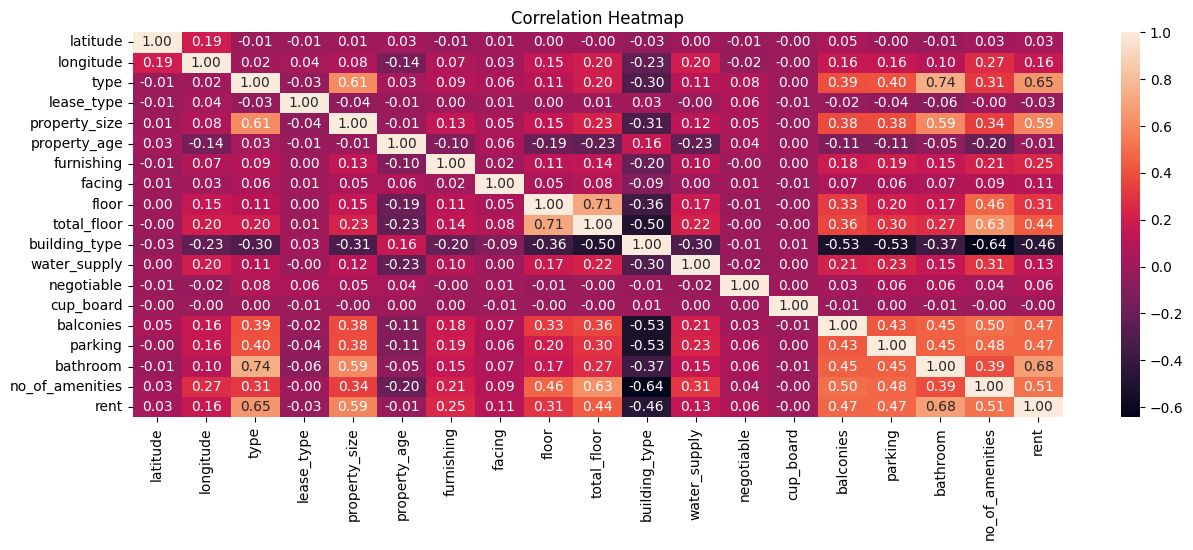

In [ ]:
# Calculate the correlation matrix
df1_corr = df1[['latitude', 'longitude', 'type', 'lease_type', 'property_size', 'property_age', 'furnishing', 'facing', 'floor', 'total_floor',
                'building_type', 'water_supply', 'negotiable', 'cup_board', 'balconies', 'parking', 'bathroom', 'no_of_amenities', 'rent']].corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(df1_corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# df1.to_csv('df_final.csv', index=False)

## **Model Assessment**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/gopiashokan/Rental-Property-Prices-Prediction/main/Dataset/df_final.csv')

In [ ]:
df1.tail()

,activation_day,activation_month,activation_year,locality,latitude,longitude,type,lease_type,property_size,property_age,furnishing,facing,floor,total_floor,building_type,water_supply,negotiable,cup_board,balconies,parking,bathroom,gym,lift,swimming_pool,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
20339,10,11,2017,Ulsoor,12.979762,77.615395,1,4,850,30.0,1,2,1.0,4.0,1,2,1,1.0,1.0,1,2.0,0,1,0,1,0,0.0,0,0.0,1,0.0,1,1,1.0,1,0.0,0.0,1,0,1.0,9.0,20000.0
20340,19,10,2017,Koramangala 4th Block,12.931072,77.632361,2,4,1000,10.0,1,1,1.0,2.0,2,1,1,2.0,2.0,3,2.0,0,0,0,1,0,0.0,0,0.0,0,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0,4.0,30000.0
20341,21,12,2017,Kumaraswamy Layout,12.901800,77.566597,2,2,1000,0.0,1,3,5.0,5.0,1,3,1,2.0,2.0,3,2.0,1,1,0,1,0,1.0,0,1.0,0,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0,8.0,16000.0
20342,28,6,2018,Indiranagar,12.965502,77.647694,2,2,1000,5.0,1,2,2.0,4.0,1,2,0,2.0,3.0,3,2.0,0,1,0,1,0,0.0,0,1.0,1,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0,10.0,30000.0
20343,7,8,2018,Malleshwaram West,12.998645,77.574336,1,4,500,3.0,1,2,1.0,1.0,2,1,1,1.0,1.0,1,1.0,0,0,0,0,0,0.0,0,0.0,0,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0,2.0,8500.0


In [ ]:
df1.columns

Index(['activation_day', 'activation_month', 'activation_year', 'locality',
       'latitude', 'longitude', 'type', 'lease_type', 'property_size',
       'property_age', 'furnishing', 'facing', 'floor', 'total_floor',
       'building_type', 'water_supply', 'negotiable', 'cup_board', 'balconies',
       'parking', 'bathroom', 'gym', 'lift', 'swimming_pool', 'internet', 'ac',
       'club', 'intercom', 'cpa', 'fs', 'servant', 'security', 'sc', 'gp',
       'park', 'rwh', 'stp', 'hk', 'pb', 'vp', 'no_of_amenities', 'rent'],
      dtype='object')

In [ ]:
import sklearn
sklearn.__version__

'1.3.2'

In [ ]:
'''
prevent the Colab runtime from disconnecting & automatically click the connect button in Google Colab at regular intervals (every minute)

copy below javascript --> in colab, right click and select Inspect --> paste in console


function ConnectButton(){
     console.log("Connect pushed");
     document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
}
setInterval(ConnectButton,60000);
'''

In [ ]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(df, algorithm):

    x = df1.drop(columns=['locality', 'rent'], axis=1)
    y = df1['rent']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [ ]:
print(machine_learning_regression(df1, DecisionTreeRegressor))
print(machine_learning_regression(df1, ExtraTreesRegressor))
print(machine_learning_regression(df1, RandomForestRegressor))
print(machine_learning_regression(df1, AdaBoostRegressor))
print(machine_learning_regression(df1, GradientBoostingRegressor))
print(machine_learning_regression(df1, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.6119988857675056}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.7739047514638809}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9727709802381985, 'R2_test': 0.8058462726189007}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.5303647320589631, 'R2_test': 0.5122885380778592}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8124807266319778, 'R2_test': 0.7907707121330785}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9338734998820475, 'R2_test': 0.8157097298212435}


In [ ]:
x = df1.drop(columns=['locality', 'rent'], axis=1)
y = df1['rent']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# best parameters for hypertuning the random forest algorithm for better accuracy in unseen data
grid_search_r.best_params_,grid_search_r.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 10},
 0.8025521909826029)

In [ ]:
x = df1.drop(columns=['locality', 'rent'], axis=1)
y = df1['rent']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9398248514990458, 0.8029100515725566)

In [ ]:
x = df1.drop(columns=['locality', 'rent'], axis=1)
y = df1['rent']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=5).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics

{'R2': 0.8050123485491882,
 'Mean Absolute Error': 2648.4062092299278,
 'Mean Squared Error': 14027182.199315216,
 'Root Mean Squared Error': 3745.2879995155536}

In [ ]:
user_data = np.array([[10,9,2017,12.93,77.67,2,4,1400,4,1,5,3,4,1,1,1,2,2,3,2,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,8]])
y_pred = model.predict(user_data)
y_pred[0]

24078.025941253196

In [ ]:
# save the regression model by using pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# load the pickle model

with open('/content/regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[10,9,2017,12.93,77.67,2,4,1400,4,1,5,3,4,1,1,1,2,2,3,2,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,8]])
y_pred = model.predict(user_data)
y_pred[0]

24078.025941253196